In [1]:
import json
from matplotlib import pyplot as plt
import sklearn
from collections import defaultdict
from sklearn import linear_model
import numpy as np
import random
import gzip
import math
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [4]:
len(dataset)

192544

In [5]:
dataset[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

In [6]:
########PART A


rtr_data = pd.read_json('renttherunway_final_data.json', lines=True)
rtr_data.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [7]:
rtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [8]:
#print(mc_data)
print(rtr_data[['weight']].to_string(index=False))

weight
137lbs
132lbs
   NaN
135lbs
145lbs
138lbs
112lbs
118lbs
   NaN
114lbs
135lbs
135lbs
120lbs
142lbs
118lbs
140lbs
170lbs
143lbs
115lbs
135lbs
145lbs
140lbs
   NaN
120lbs
140lbs
140lbs
120lbs
140lbs
   NaN
123lbs
123lbs
122lbs
   NaN
112lbs
165lbs
   NaN
143lbs
130lbs
120lbs
   NaN
130lbs
145lbs
155lbs
130lbs
105lbs
135lbs
130lbs
190lbs
   NaN
150lbs
145lbs
136lbs
145lbs
120lbs
115lbs
115lbs
128lbs
174lbs
125lbs
135lbs
   NaN
110lbs
135lbs
143lbs
135lbs
140lbs
125lbs
112lbs
   NaN
115lbs
   NaN
160lbs
128lbs
170lbs
128lbs
120lbs
145lbs
135lbs
125lbs
180lbs
   NaN
   NaN
175lbs
   NaN
110lbs
130lbs
130lbs
140lbs
128lbs
128lbs
160lbs
140lbs
130lbs
145lbs
134lbs
150lbs
155lbs
140lbs
130lbs
175lbs
145lbs
109lbs
124lbs
   NaN
132lbs
112lbs
118lbs
125lbs
125lbs
128lbs
250lbs
195lbs
150lbs
160lbs
150lbs
165lbs
231lbs
135lbs
128lbs
175lbs
135lbs
135lbs
120lbs
145lbs
155lbs
145lbs
120lbs
115lbs
140lbs
155lbs
   NaN
175lbs
   NaN
161lbs
110lbs
126lbs
210lbs
160lbs
130lbs
165lbs
145lbs
120lbs

In [9]:
missing_data_sum = rtr_data.isnull().sum()
print(missing_data_sum,"\n")
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/rtr_data.shape[0])*100})
print(missing_data)

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64 

                total_missing_values  percentage_of_missing_values
fit                                0                      0.000000
user_id                            0                      0.000000
bust size                      18411                      9.561970
item_id                            0                      0.000000
weight                         29982                     15.571506
rating                            82                      0.042588
rented for                        10                      0.005194
review_text                        0                      0.000000
body type             

In [10]:
rtr_data.dtypes

fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [11]:
rtr_data.nunique()
#user id repeating

fit                    3
user_id           105571
bust size            106
item_id             5850
weight               190
rating                 5
rented for             9
review_text       191031
body type              7
review_summary    154740
category              68
height                24
size                  56
age                   89
review_date         2274
dtype: int64

In [12]:
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(rtr_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

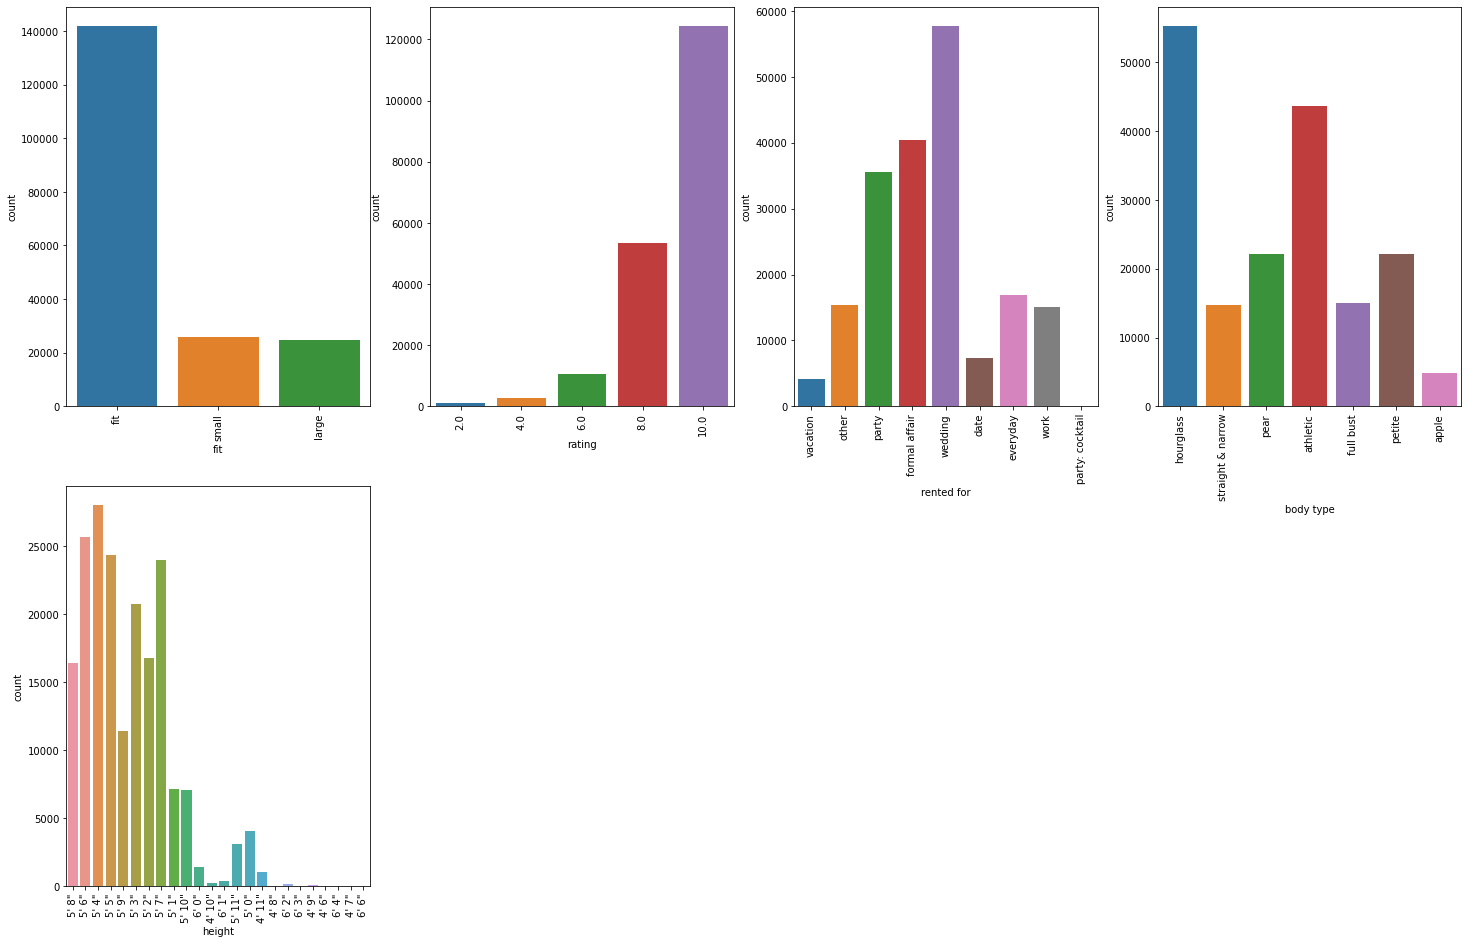

In [13]:
uniques_data = ['fit','rating','rented for','body type','height']
countplot(uniques_data)

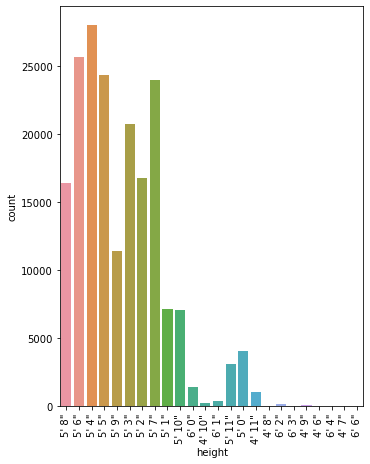

In [14]:
uniques_data1 = ['height']
countplot(uniques_data1)

In [15]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('\'','').replace('"', '') #'5\' 8"'
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

rtr_data.height = rtr_data.height.astype(str).apply(height_in_cms)
rtr_data.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category  height  size  \
0                               So many compliments!   romper   172.7    14   
1                            I felt so glamourous!!!     gown   167.6    12   
2  It was a great time to celebrate the (almost) ...   sheath   162.6     4   
3   Dress arrived on time and in perfect condition.     dress   165.1     8   
4                    Was in love with this dress !!!     gown   175.3    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [16]:
def weightwolbs(w):
    if w != None:
        w=int(w[:3])
    return w


In [17]:
weightwolbs('132bs')

132

In [18]:
rtr_data.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category  height  size  \
0                               So many compliments!   romper   172.7    14   
1                            I felt so glamourous!!!     gown   167.6    12   
2  It was a great time to celebrate the (almost) ...   sheath   162.6     4   
3   Dress arrived on time and in perfect condition.     dress   165.1     8   
4                    Was in love with this dress !!!     gown   175.3    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

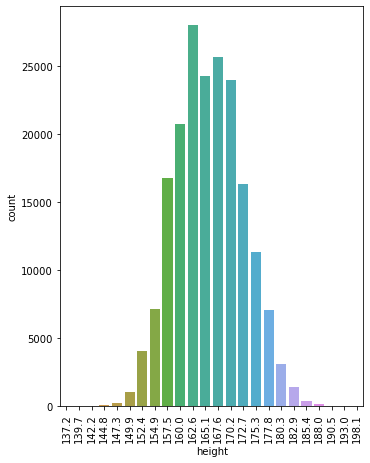

In [19]:
uniques_data1 = ['height']
countplot(uniques_data1)

In [20]:
rtr_data.height.fillna(value=rtr_data.height.mean(), inplace=True)
rtr_data.height.isnull().sum()

0

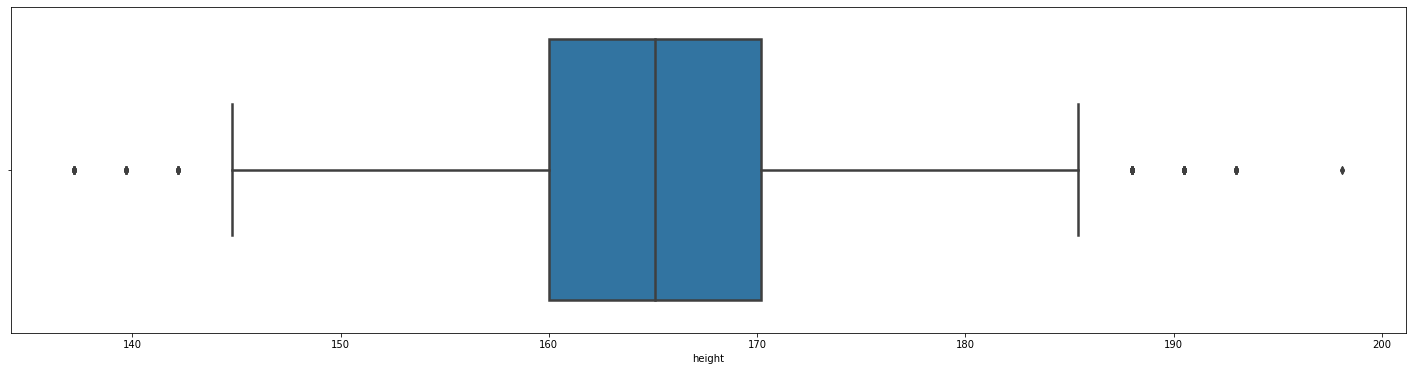

In [21]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)
plot_outlier(rtr_data.height)

In [22]:
def get_outliers_range(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [23]:
ht_lower_range,ht_upper_range = get_outliers_range(rtr_data.height)
ht_lower_range,ht_upper_range

(144.70000000000002, 185.49999999999997)

In [24]:
#height outliers

rtr_data[(rtr_data.height < ht_lower_range) | (rtr_data.height > ht_upper_range)]

fit  user_id bust size  item_id  weight  rating     rented for  \
622       fit    55898       36c   123793  145lbs    10.0        wedding   
772       fit   443791       38d   145417  180lbs     8.0          other   
3772      fit   189946       34b   284665  135lbs    10.0        wedding   
4161      fit   798321       34d  1213427  180lbs    10.0        wedding   
6180      fit   189946       34b  1207360  135lbs     8.0        wedding   
...       ...      ...       ...      ...     ...     ...            ...   
189201  large   851850       NaN  1010926  185lbs    10.0  formal affair   
190945    fit    94813       32a   134393  125lbs    10.0          party   
191008    fit   173019       NaN  2443818     NaN    10.0           date   
191744    fit   448529       36c   131117  175lbs     8.0        wedding   
192109    fit   449600       36b   947192  170lbs    10.0        wedding   

                                              review_text  body type  \
622     It hugs around the hips and body really nicely...       pear   
772     I rented this dress for Thanksgiving dinner ou...  hourglass   
3772    Wore this dress for my wedding rehearsal dinne...       pear   
4161    This dress was absolutely stunning. It was lon...   athletic   
6180    I wore this 6 weeks postpartum and it was grea...       pear   
...                                                   ...        ...   
189201  This dress clings and hands perfectly! I was c...        NaN   
190945  I usually wear a 0 because I have a small wais...  hourglass   
191008                                        perfect fit        NaN   
191744  My size is 10L but I ended up wearing 12L as I...  hourglass   
192109  This dress has a really flattering neckline an...   athletic   

                                           review_summary category  height  \
622                       I got soooo many compliments!!      gown   142.2   
772                        Flattering, conservative dress    dress   188.0   
3772               Would recommend - tight sleeves though   sheath   142.2   
4161         Sophisticated, beautiful dress for a wedding     gown   190.5   
6180                             Perfect for fall wedding   sheath   142.2   
...                                                   ...      ...     ...   
189201                            This dress is perfect!      gown   188.0   
190945             Very feminine, cute & worth the prize!    dress   139.7   
191008                                         Love, love      top   137.2   
191744                           It hid my post baby bump     gown   190.5   
192109  Beautiful, colorful, comfortable dress - and i...    dress   188.0   

        size   age        review_date  
622       13  25.0  December 26, 2013  
772       20  38.0    January 8, 2015  
3772      12  34.0    January 4, 2015  
4161      21  22.0     April 26, 2016  
6180       8  34.0   November 2, 2017  
...      ...   ...                ...  
189201    21  35.0   December 6, 2017  
190945     1  28.0  February 10, 2016  
191008    14  43.0       May 21, 2016  
191744    25  40.0    October 9, 2014  
192109    16  33.0      June 10, 2015  

[228 rows x 15 columns]

In [25]:
#removing outliers

rtr_df = rtr_data.drop(rtr_data[(rtr_data.height < ht_lower_range) | (rtr_data.height > ht_upper_range)].index)

rtr_df.reset_index(drop=True, inplace=True)
rtr_df.shape

(192316, 15)

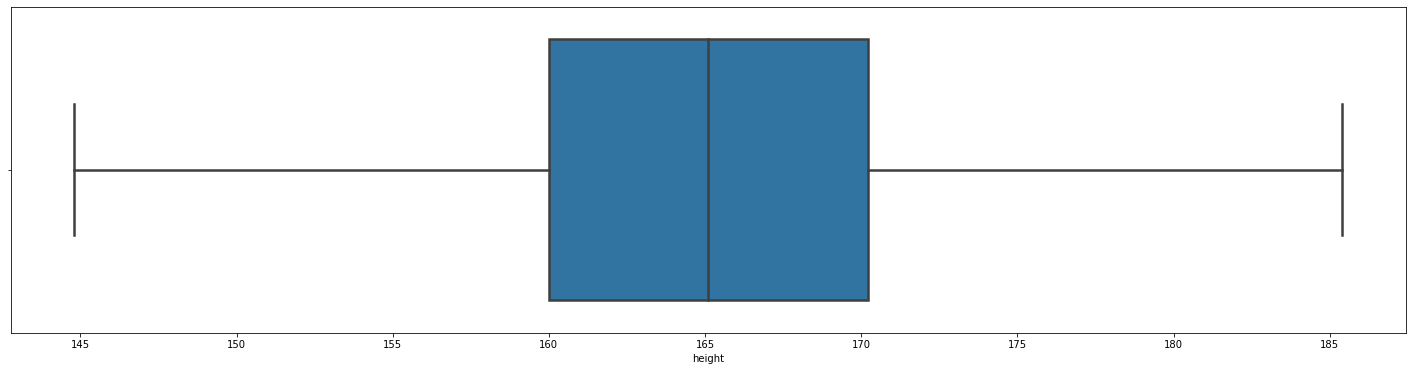

In [26]:
plot_outlier(rtr_df.height)

In [27]:
def plot_dist(df, independent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None

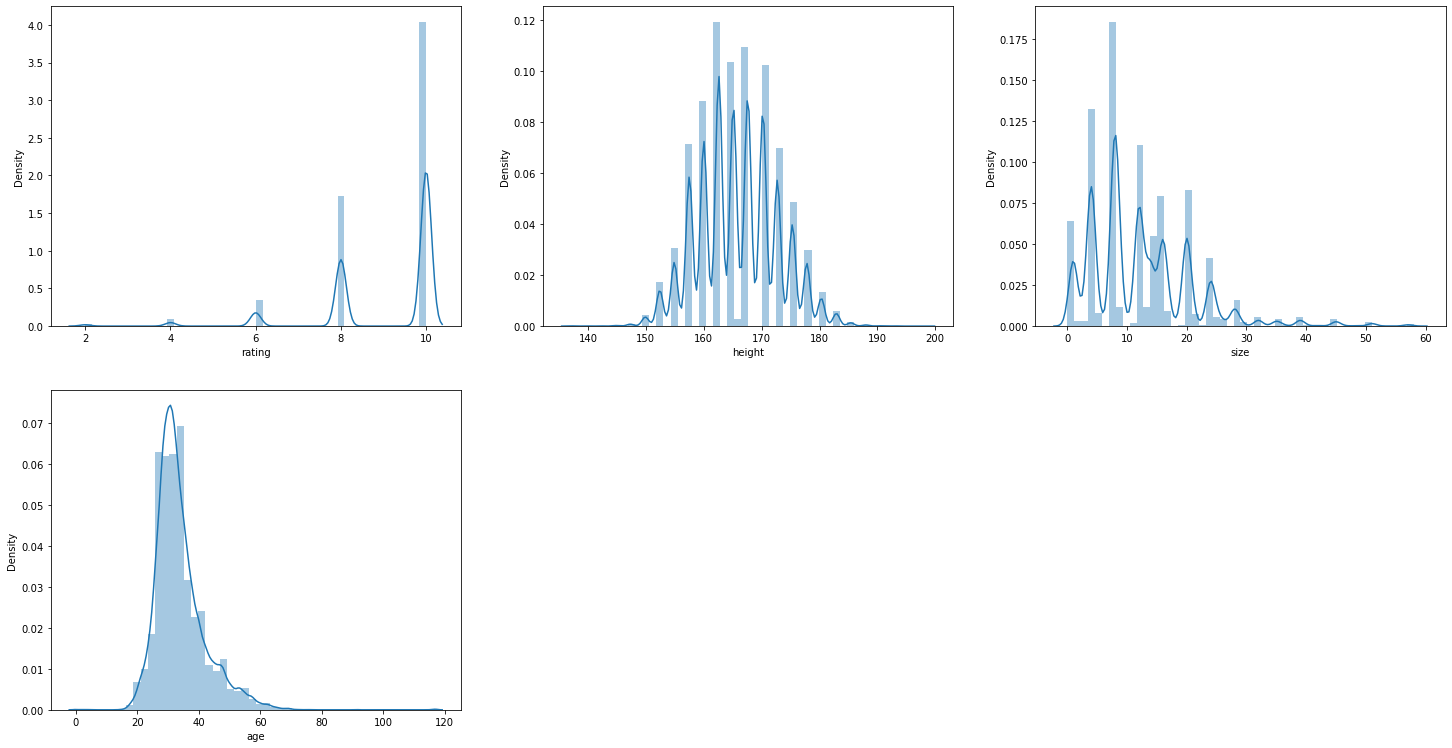

In [28]:
plot_dist(rtr_data, ['rating','height','size','age'])#'weight'

In [29]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [30]:
rtr_data.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category  height  size  \
0                               So many compliments!   romper   172.7    14   
1                            I felt so glamourous!!!     gown   167.6    12   
2  It was a great time to celebrate the (almost) ...   sheath   162.6     4   
3   Dress arrived on time and in perfect condition.     dress   165.1     8   
4                    Was in love with this dress !!!     gown   175.3    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [31]:
print(rtr_data[['height']].to_string(index=False)) 

    height
172.700000
167.600000
162.600000
165.100000
175.300000
172.700000
160.000000
160.000000
167.600000
160.000000
160.000000
167.600000
167.600000
157.500000
165.100000
170.200000
172.700000
165.100000
160.000000
167.600000
165.100000
167.600000
165.100000
167.600000
172.700000
167.600000
167.600000
160.000000
175.300000
154.900000
160.000000
165.100000
160.000000
160.000000
177.800000
172.700000
160.000000
167.600000
165.100000
167.600000
154.900000
172.700000
162.600000
162.600000
157.500000
165.100000
172.700000
172.700000
167.600000
162.600000
170.200000
170.200000
170.200000
157.500000
154.900000
170.200000
162.600000
175.300000
170.200000
172.700000
157.500000
167.600000
162.600000
162.600000
165.100000
167.600000
157.500000
170.200000
165.100000
160.000000
160.000000
167.600000
172.700000
172.700000
165.100000
162.600000
165.100000
167.600000
175.300000
165.100000
157.500000
167.600000
175.300000
165.100000
162.600000
167.600000
160.000000
160.000000
162.600000
162.600000